In [1]:
#Step1: data used 
#test and train data downloaded from kaggle
#importing libraries
#numpy for mathematical calculation
#pandas for data manipulation and analysis


import numpy as np
import pandas as pd
pd.to_csv('filename.csv',index = False)

AttributeError: module 'pandas' has no attribute 'to_csv'

In [ ]:
#Loading the train and test data set using pandas  
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
#Step2: Printing,Visualize data,attribute,numberof records and missing data
#printing first 5 rows of train dataset
train.head(10)

In [ ]:
#Data index
#Survived: 0 = No, 1 = Yes
#Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
#Sibsp: # of siblings / spouses aboard the Titanic
#Parch: # of parents / children aboard the Titanic
#Ticket: Ticket number
#Cabin: Cabin number
#Embarked: C,Q,S
#Printing test dataset
test.head()

In [ ]:
#Total rows and coloumns
train.shape

In [ ]:
test.shape

In [2]:
#setting the index as passenger id
train.set_index(['PassengerId'],inplace=True)
test.set_index(['PassengerId'],inplace=True)

NameError: name 'train' is not defined

In [3]:
train.head(10)

NameError: name 'train' is not defined

In [4]:
test.head()

NameError: name 'test' is not defined

In [5]:
train.info()

NameError: name 'train' is not defined

In [6]:
test.info()

NameError: name 'test' is not defined

In [14]:
#Age and Cabin have a lot of missing value
#Missing data in the training data set can reduce the fit or lead to biased model might cause wrong prediction
#First counting the number of missing values present in train and test dataset
#Training the missing values present in each rows and columns
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [16]:
#Step3: Correlation
#For analyzing and visualizing we need to deal with Different variables and  Null values
#To get the desired input we are making adjustments
#For visualization importing python library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Setting seaborn default for plots
sns.set()

In [17]:
#Bar Chart for Categorical Features
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

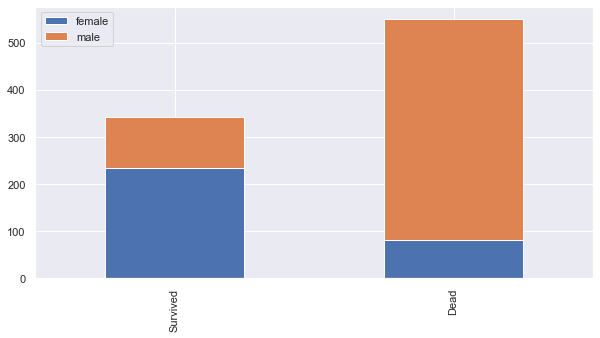

In [18]:
#Showing survival chart according to sex
bar_chart('Sex')

In [19]:
#The Chart confirms Women more likely survivied than Men

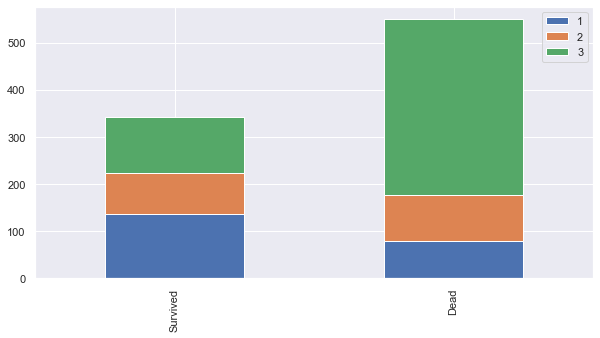

In [20]:
#Showing survival chart according to Pclass
bar_chart('Pclass')

In [21]:
#The Chart confirms 1st class more likely survived than other classes
#The Chart confirms 3rd class more likely dead than other classes

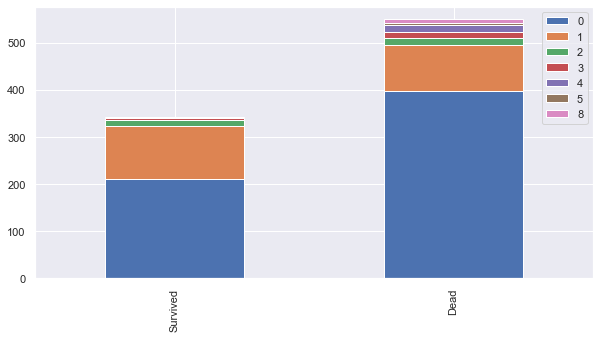

In [22]:
#Showing survival chart according to SibSp
bar_chart('SibSp')

In [23]:
#The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived
#The Chart confirms a person aboarded without siblings or spouse more likely dead

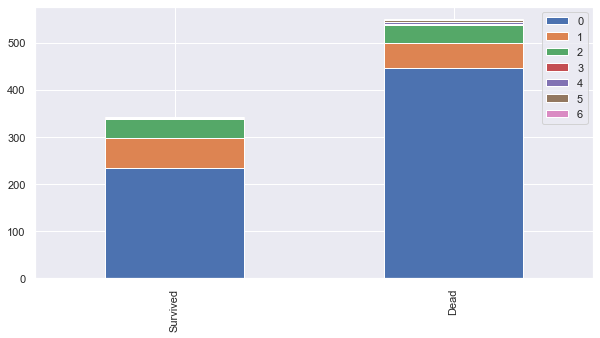

In [24]:
#Showing survival chart according to Parch
bar_chart('Parch')

In [25]:
#The Chart confirms a person aboarded with more than 2 parents or children more likely survived
#The Chart confirms a person aboarded alone more likely dead

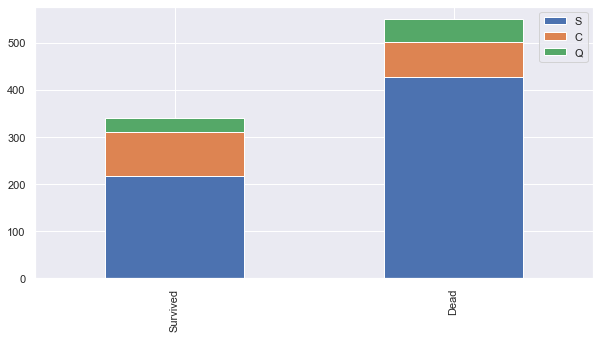

In [26]:
#Showing survival chart according to Embarked
bar_chart('Embarked')


In [27]:
#The Chart confirms a person aboarded from C slightly more likely survived
#The Chart confirms a person aboarded from Q more likely dead
#The Chart confirms a person aboarded from S more likely dead

In [28]:
#Step4: New attribute from existing attributes
#Using Feature engineering for a numerical representation of objects 
#This representations facilitate processing and statistical analysis.
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [29]:
#Merging both train and test data
train_test_data = [train, test] 
#Extracting Title of Name for easier identification 
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Lady          1
Sir           1
Don           1
Countess      1
Ms            1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

In [31]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [32]:
#Mapping Title
#Mr : 0
#Miss : 1
#Mrs: 2
#Others: 3
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


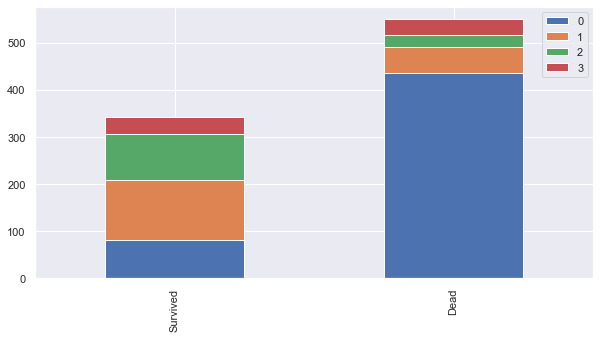

In [35]:
#Showing survival chart according to Title 
bar_chart('Title')

In [36]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [37]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,
892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [38]:
#Mapping Sex
#male: 0 
#female: 1

sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

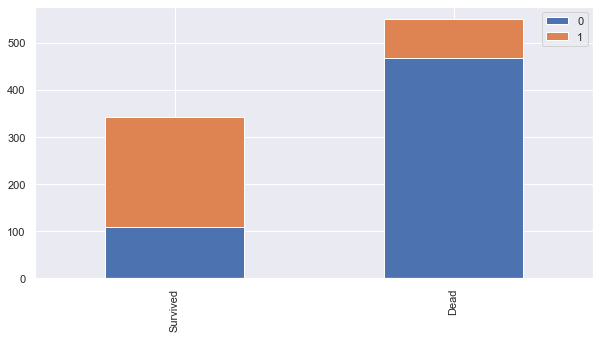

In [39]:
#Showing survival chart according to Mapped Sex
bar_chart('Sex')

In [40]:
#Some age is missing
#So using Title's median age for missing Age
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2


In [41]:
#Filling missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)


In [42]:
#Median used as it doesn't effect much is central tendency
train.head(30)
train.groupby("Title")["Age"].transform("median")

PassengerId
1      30.0
2      35.0
3      21.0
4      35.0
5      30.0
       ... 
887     9.0
888    21.0
889    21.0
890    30.0
891    30.0
Name: Age, Length: 891, dtype: float64

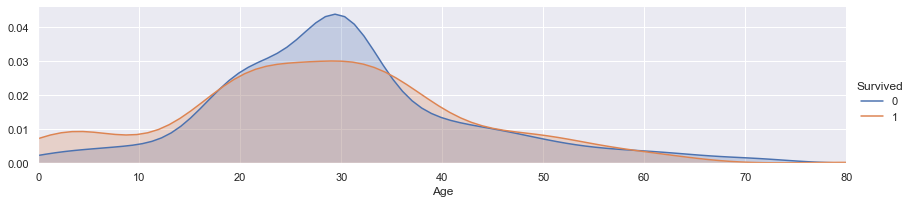

In [43]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
 9   Title     418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 35.9+ KB


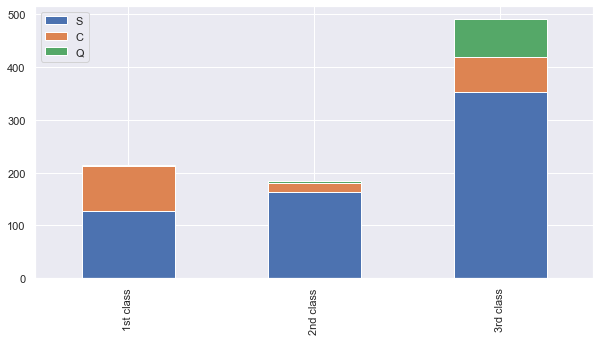

In [46]:
#Embarked
#Filling missing values
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [47]:
#more than 50% of 1st class are from S embark
#more than 50% of 2nd class are from S embark
#more than 50% of 3rd class are from S embark

In [48]:
#Filling out missing embark with S embark
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [49]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [50]:
#Mapping Embarked
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)


In [51]:
#Filling the missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0
6,0,3,0,30.0,0,0,330877,8.4583,NaN,2,0
7,0,1,0,54.0,0,0,17463,51.8625,E46,0,0
8,0,3,0,2.0,3,1,349909,21.0750,NaN,0,3
9,1,3,1,27.0,0,2,347742,11.1333,NaN,0,2


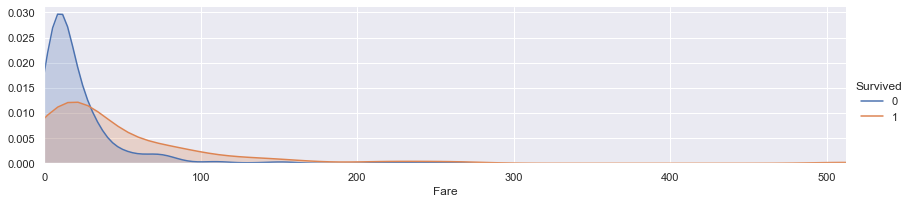

In [52]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

In [53]:
#Cabin
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
              ..
B82 B84        1
E34            1
C104           1
E58            1
A6             1
Name: Cabin, Length: 147, dtype: int64

In [54]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

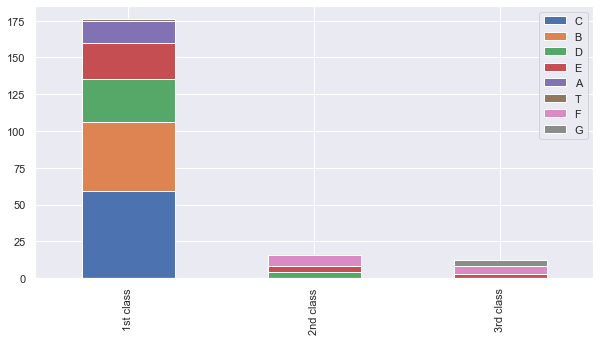

In [55]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))


In [56]:
#Cabin Mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [57]:
#Filling the missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0
6,0,3,0,30.0,0,0,330877,8.4583,2.0,2,0
7,0,1,0,54.0,0,0,17463,51.8625,1.6,0,0
8,0,3,0,2.0,3,1,349909,21.0750,2.0,0,3
9,1,3,1,27.0,0,2,347742,11.1333,2.0,0,2


In [58]:
#New feature Family Size 
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

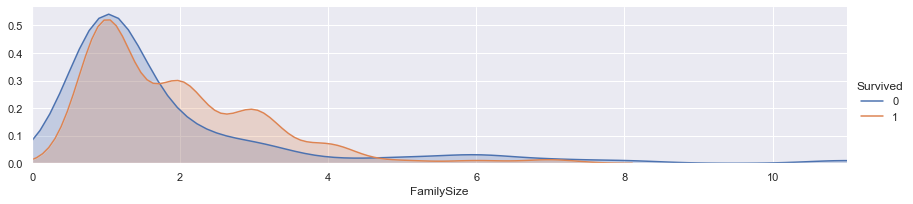

In [59]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [60]:
#Family Mapping according to Family Size
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [63]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,0.4
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,0.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,0.4
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,0.0


In [66]:
features_drop = ['Ticket', 'SibSp', 'Parch']
#train = train.drop(features_drop, axis=1)
#test = test.drop(features_drop, axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,
1,0,3,0,22.0,7.2500,2.0,0,0,0.4
2,1,1,1,38.0,71.2833,0.8,1,2,0.4
3,1,3,1,26.0,7.9250,2.0,0,1,0.0
4,1,1,1,35.0,53.1000,0.8,0,2,0.4
5,0,3,0,35.0,8.0500,2.0,0,0,0.0


In [67]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [68]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,
1,3,0,22.0,7.2500,2.0,0,0,0.4
2,1,1,38.0,71.2833,0.8,1,2,0.4
3,3,1,26.0,7.9250,2.0,0,1,0.0
4,1,1,35.0,53.1000,0.8,0,2,0.4
5,3,0,35.0,8.0500,2.0,0,0,0.0
6,3,0,30.0,8.4583,2.0,2,0,0.0
7,1,0,54.0,51.8625,1.6,0,0,0.0
8,3,0,2.0,21.0750,2.0,0,3,1.6
9,3,1,27.0,11.1333,2.0,0,2,0.8


In [69]:
#data describe
train.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.372806,32.204208,1.669585,0.361392,0.710438,0.361841
std,0.486592,0.836071,0.477990,13.227346,49.693429,0.540335,0.635673,0.968778,0.645383
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,7.910400,1.600000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,30.000000,14.454200,2.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000,1.000000,0.400000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.800000,2.000000,3.000000,4.000000


In [70]:
#Groupby "Survived"
train.groupby('Survived').mean()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
Survived,,,,,,,,
0,2.531876,0.147541,30.166667,22.117887,1.788707,0.307832,0.369763,0.353370
1,1.950292,0.681287,28.098450,48.395408,1.478363,0.447368,1.257310,0.375439


In [71]:
#Correlation Matrix
train.corr()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.076083,0.257307,-0.279477,0.106811,0.445792,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.348490,-0.549500,0.864697,0.045702,-0.164205,0.065997
Sex,0.543351,-0.131900,1.000000,-0.104150,0.182333,-0.093314,0.116569,0.557890,0.200988
Age,-0.076083,-0.348490,-0.104150,1.000000,0.097720,-0.309183,-0.033157,-0.155985,-0.270353
Fare,0.257307,-0.549500,0.182333,0.097720,1.000000,-0.576451,0.062142,0.144773,0.217138
Cabin,-0.279477,0.864697,-0.093314,-0.309183,-0.576451,1.000000,-0.041238,-0.141768,0.057629
Embarked,0.106811,0.045702,0.116569,-0.033157,0.062142,-0.041238,1.000000,0.049699,-0.080281
Title,0.445792,-0.164205,0.557890,-0.155985,0.144773,-0.141768,0.049699,1.000000,0.366883
FamilySize,0.016639,0.065997,0.200988,-0.270353,0.217138,0.057629,-0.080281,0.366883,1.000000


In [72]:
#Step5: Selecting Classification Model
#Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 69.6 KB


In [74]:
#Step6: Performing cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [75]:
#kNN Classifier Model
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7        0.79775281 0.70786517 0.66292135 0.69662921 0.73033708
 0.75280899 0.73033708 0.71910112 0.74157303]


In [76]:
# kNN Score
round(np.mean(score)*100, 2)


72.39

In [77]:
#DecisionTree Classifier Model
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.74444444 0.79775281 0.80898876 0.75280899 0.79775281 0.79775281
 0.7752809  0.7752809  0.79775281 0.78651685]


In [78]:
#Decision tree Score
round(np.mean(score)*100, 2)


78.34

In [79]:
#Random Forest Classifier Model
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.84269663 0.79775281 0.80898876 0.80898876 0.79775281
 0.7752809  0.80898876 0.79775281 0.83146067]


In [80]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.59

In [81]:
#Naive Bayes Classification Model
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.75280899 0.76404494 0.75280899 0.73033708 0.83146067
 0.80898876 0.82022472 0.82022472 0.83146067]


In [82]:
#Naive Bayes Score
round(np.mean(score)*100, 2)

79.23

In [83]:
#SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.65555556 0.76404494 0.68539326 0.57303371 0.76404494 0.70786517
 0.66292135 0.68539326 0.60674157 0.62921348]


In [91]:
#SVM Score
round(np.mean(score)*100,2)

67.34

In [92]:
#From the score we can see Random Forest Classification Model is best

In [93]:
#Testing
test=pd.read_csv('test.csv')
prediction=pd.read_csv('train.csv')
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction['Survived']})
submission.to_csv('submission.csv',index=False)


In [105]:
#Step7: Techniques
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [106]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}


In [107]:
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

NameError: name 'X' is not defined

In [108]:
submission=pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892.0,0
1,893.0,1
2,894.0,1
3,895.0,1
4,896.0,0
